<a href="https://colab.research.google.com/github/KulsoomBibi/AtomCampTesting/blob/main/Zomato_Restaurants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random

In [2]:
from google.colab import files
uploaded = files.upload()

# Print the names of the uploaded files
print(uploaded.keys())


Saving zomato_restaurants_in_India.csv to zomato_restaurants_in_India.csv
dict_keys(['zomato_restaurants_in_India.csv'])


In [3]:
import io
import pandas as pd

zomato = pd.read_csv(io.BytesIO(uploaded['zomato_restaurants_in_India.csv']))

In [4]:
zomato

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [6]:
missing_values = zomato.isnull().sum()
missing_percentage = (missing_values / len(zomato)) * 100

missing_data_analysis = pd.DataFrame({'Number of Missing Values': missing_values,
                                      'Percentage': missing_percentage})
missing_data_analysis.sort_values(by='Percentage', ascending=False)

,Number of Missing Values,Percentage
zipcode,163187,76.995338
timings,3874,1.827841
cuisines,1391,0.656305
address,134,0.063224
opentable_support,48,0.022647
delivery,0,0.000000
photo_count,0,0.000000
votes,0,0.000000
rating_text,0,0.000000
aggregate_rating,0,0.000000


In [7]:
common_zipcode_per_locality = zomato.groupby('locality_verbose')['zipcode'].agg(pd.Series.mode)

zomato_imputed = zomato.copy()
zomato_imputed['zipcode'] = zomato_imputed.apply(
    lambda row: common_zipcode_per_locality[row['locality_verbose']] if pd.isna(row['zipcode']) else row['zipcode'],
    axis=1)

missing_values_before = zomato['zipcode'].isnull().sum()
missing_values_after = zomato_imputed['zipcode'].isnull().sum()

(missing_values_before, missing_values_after)

(163187, 0)

In [8]:
missing_values_imputed = zomato_imputed.isnull().sum()
missing_percentage_imputed = (missing_values_imputed / len(zomato_imputed)) * 100

missing_data_analysis_imputed = pd.DataFrame({'Number of Missing Values': missing_values_imputed,
                                              'Percentage': missing_percentage_imputed})
missing_data_analysis_imputed.sort_values(by='Percentage', ascending=False)

,Number of Missing Values,Percentage
timings,3874,1.827841
cuisines,1391,0.656305
address,134,0.063224
opentable_support,48,0.022647
delivery,0,0.000000
photo_count,0,0.000000
votes,0,0.000000
rating_text,0,0.000000
aggregate_rating,0,0.000000
highlights,0,0.000000


In [9]:
zomato_imputed['address'] = zomato_imputed['address'].fillna('No Address')
zomato_imputed['cuisines'] = zomato_imputed['cuisines'].fillna('No Cuisine')
zomato_imputed['opentable_support'] = zomato_imputed['opentable_support'].fillna(0)

missing_values_final = zomato_imputed.isnull().sum()
missing_percentage_final = (missing_values_final / len(zomato_imputed)) * 100

missing_data_analysis_final = pd.DataFrame({'Number of Missing Values': missing_values_final,
                                            'Percentage': missing_percentage_final})
missing_data_analysis_final.sort_values(by='Percentage', ascending=False)

,Number of Missing Values,Percentage
timings,3874,1.827841
res_id,0,0.000000
name,0,0.000000
delivery,0,0.000000
opentable_support,0,0.000000
photo_count,0,0.000000
votes,0,0.000000
rating_text,0,0.000000
aggregate_rating,0,0.000000
highlights,0,0.000000


In [10]:
zomato_imputed['establishment'] = zomato_imputed['establishment'].str.replace("[\[\]']", "", regex=True)

zomato_imputed['establishment'].head()

0      Quick Bites
1      Quick Bites
2      Quick Bites
3      Quick Bites
4    Casual Dining
Name: establishment, dtype: object

In [11]:
def map_rating_to_text(rating):
    if rating < 2:
        return "Poor"
    elif rating < 3:
        return "Average"
    elif rating < 4:
        return "Good"
    elif rating < 4.5:
        return "Very Good"
    else:
        return "Excellent"

zomato_imputed['rating_text'] = zomato_imputed['aggregate_rating'].apply(map_rating_to_text)

zomato_imputed[['aggregate_rating', 'rating_text']].head()

,aggregate_rating,rating_text
0,4.4,Very Good
1,4.4,Very Good
2,4.2,Very Good
3,4.3,Very Good
4,4.9,Excellent


In [12]:
zomato_imputed['opentable_support'] = zomato_imputed['opentable_support'].fillna(0)

missing_values_opentable_support = zomato_imputed['opentable_support'].isnull().sum()
missing_values_opentable_support

0

In [13]:
dataset_description = zomato_imputed.describe()

column_datatypes = zomato_imputed.dtypes

dataset_description, column_datatypes

(             res_id        city_id       latitude      longitude  country_id  \
 count  2.119440e+05  211944.000000  211944.000000  211944.000000    211944.0   
 mean   1.349411e+07    4746.785434      21.499758      77.615276         1.0   
 std    7.883722e+06    5568.766386      22.781331       7.500104         0.0   
 min    5.000000e+01       1.000000       0.000000       0.000000         1.0   
 25%    3.301027e+06      11.000000      15.496071      74.877961         1.0   
 50%    1.869573e+07      34.000000      22.514494      77.425971         1.0   
 75%    1.881297e+07   11306.000000      26.841667      80.219323         1.0   
 max    1.915979e+07   11354.000000   10000.000000      91.832769         1.0   
 
        average_cost_for_two    price_range  aggregate_rating          votes  \
 count         211944.000000  211944.000000     211944.000000  211944.000000   
 mean             595.812229       1.882535          3.395937     378.001864   
 std              606.239363 

In [14]:
zomato_imputed['zipcode'] = pd.to_numeric(zomato_imputed['zipcode'], errors='coerce').fillna(0).astype('int64')

zomato_imputed['opentable_support'] = zomato_imputed['opentable_support'].astype('int64')

zipcode_datatype = zomato_imputed['zipcode'].dtype
opentable_support_datatype = zomato_imputed['opentable_support'].dtype

zipcode_datatype, opentable_support_datatype

(dtype('int64'), dtype('int64'))

In [15]:
zomato_no_duplicates = zomato_imputed.drop_duplicates()

rows_before = zomato_imputed.shape[0]
rows_after = zomato_no_duplicates.shape[0]
rows_removed = rows_before - rows_after

rows_before, rows_after, rows_removed

(211944, 59917, 152027)

In [16]:
dataset_shape = zomato_no_duplicates.shape
dataset_shape

(59917, 26)

In [17]:
numerical_summary = zomato.describe()

numerical_summary

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


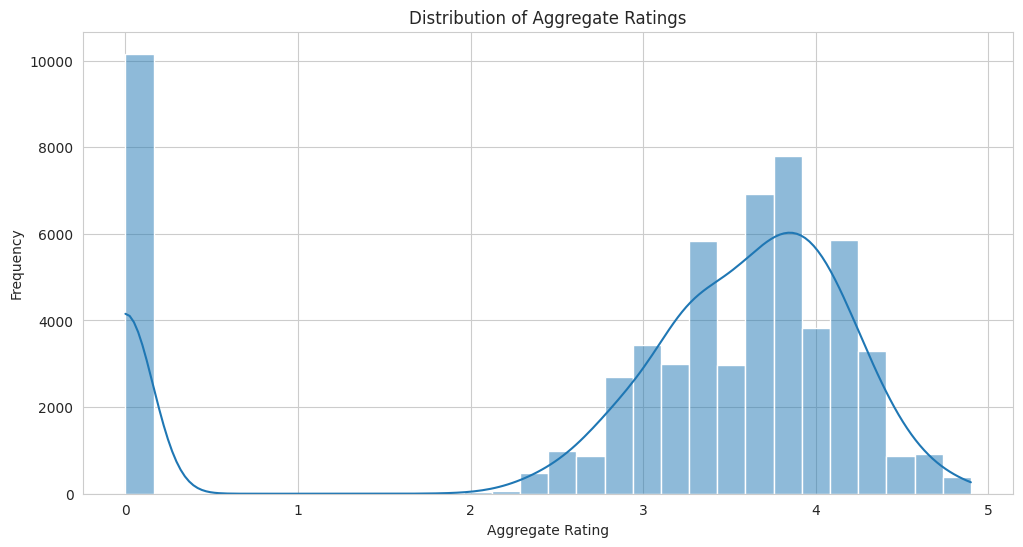

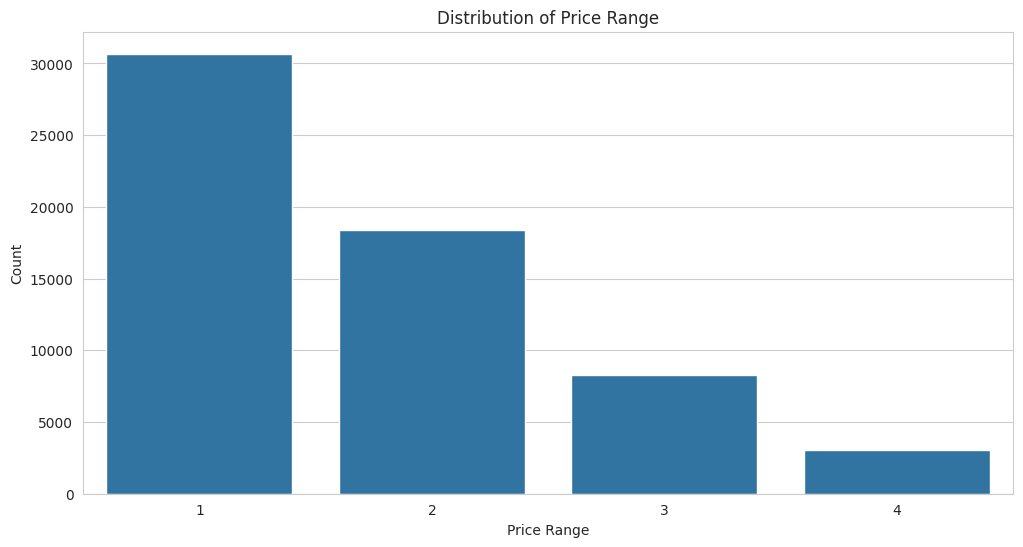

<ipython-input-18-76cda4f37235>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")


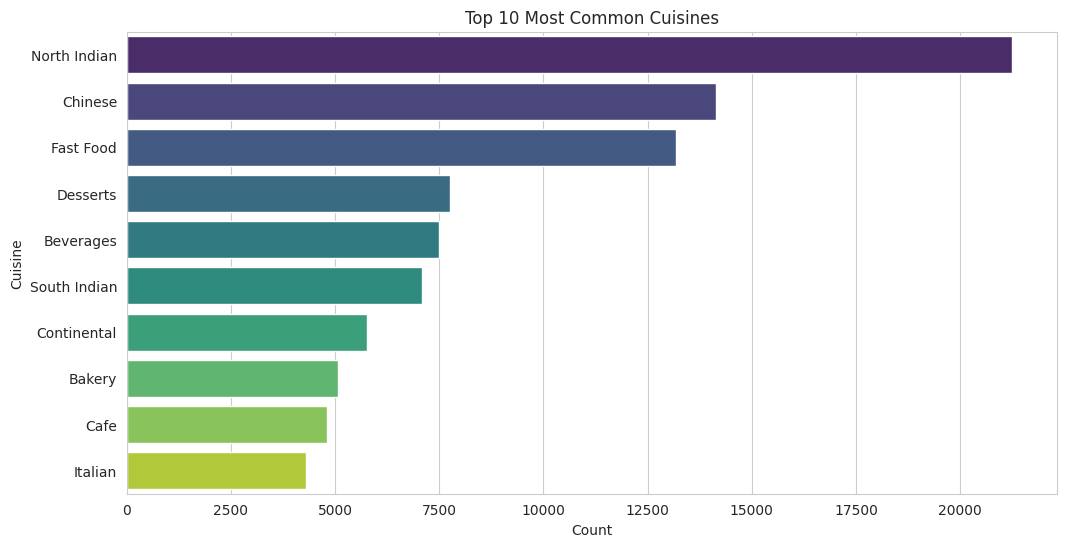

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

zomato_no_duplicates = zomato.drop_duplicates()

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(zomato_no_duplicates['aggregate_rating'], kde=True, bins=30)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='price_range', data=zomato_no_duplicates)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

cuisines_list = zomato_no_duplicates['cuisines'].str.split(', ')
cuisines_series = pd.Series([cuisine for sublist in cuisines_list.dropna() for cuisine in sublist])
top_cuisines = cuisines_series.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()


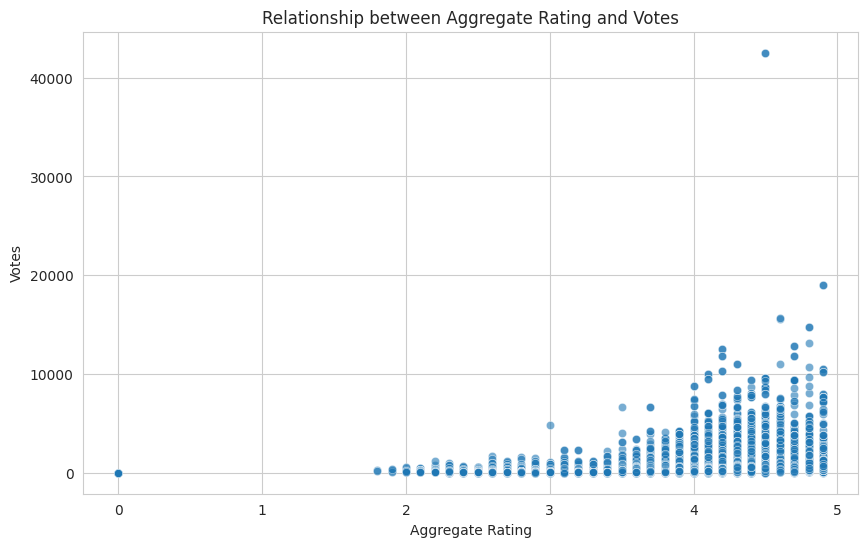

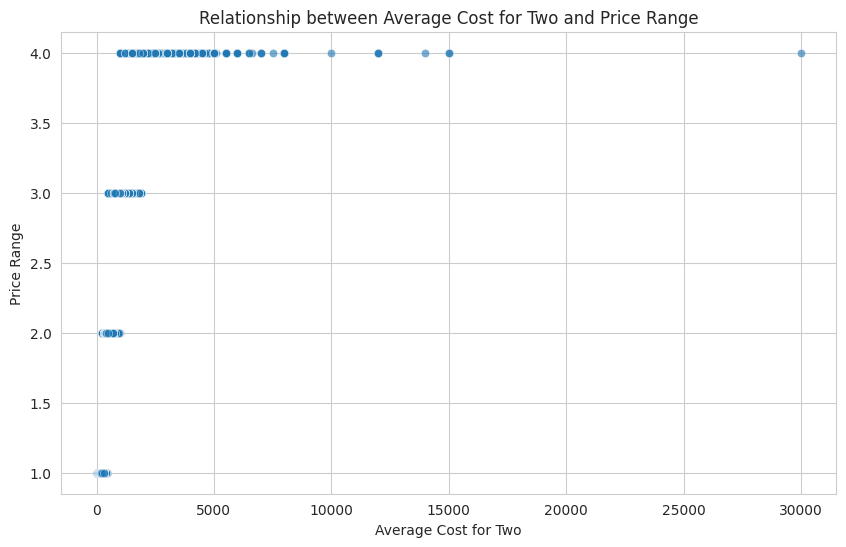

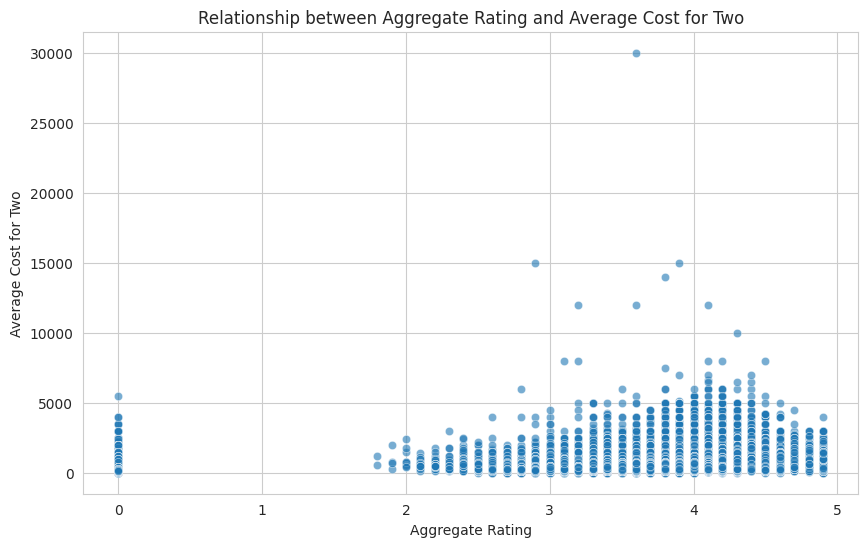

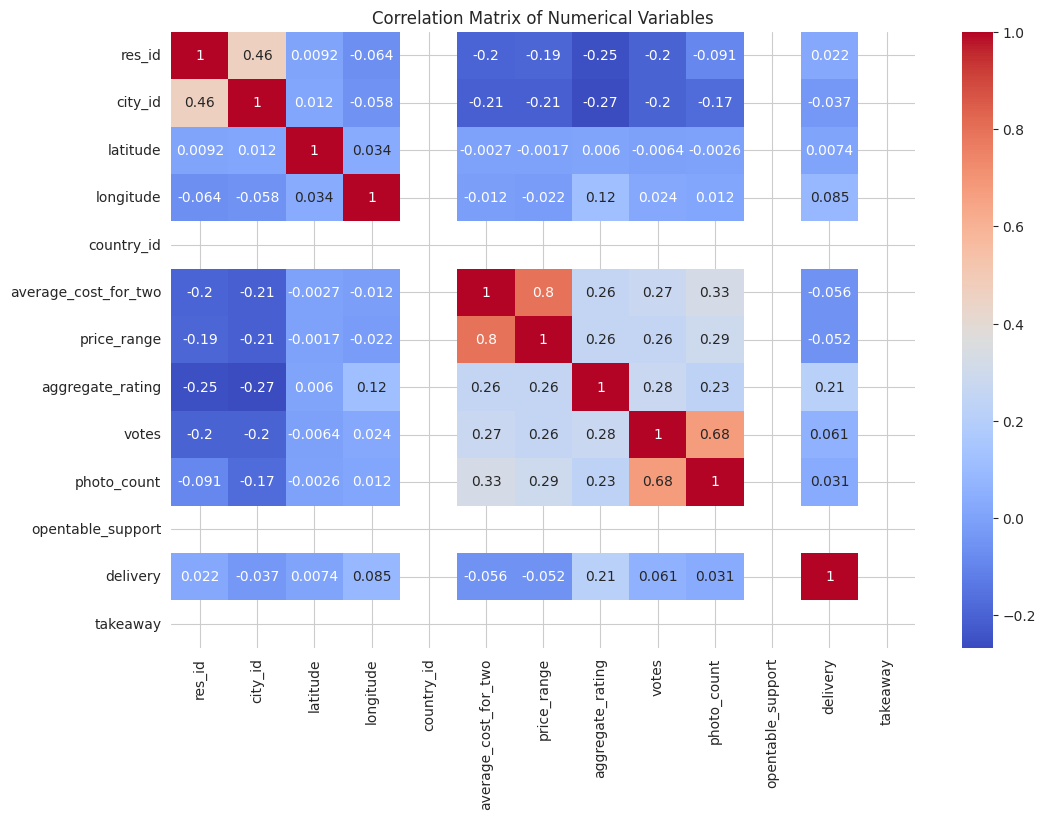

In [19]:
zomato_no_duplicates = zomato.drop_duplicates()

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=zomato_no_duplicates, x='aggregate_rating', y='votes', alpha=0.6)
plt.title('Relationship between Aggregate Rating and Votes')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=zomato_no_duplicates, x='average_cost_for_two', y='price_range', alpha=0.6)
plt.title('Relationship between Average Cost for Two and Price Range')
plt.xlabel('Average Cost for Two')
plt.ylabel('Price Range')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=zomato_no_duplicates, x='aggregate_rating', y='average_cost_for_two', alpha=0.6)
plt.title('Relationship between Aggregate Rating and Average Cost for Two')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Cost for Two')
plt.show()

numerical_columns = zomato_no_duplicates.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = zomato_no_duplicates[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [20]:
top_cities = zomato_no_duplicates['city'].value_counts().head(10)

top_cities


city
Chennai      2612
Mumbai       2538
Bangalore    2365
Pune         1911
New Delhi    1847
Jaipur       1456
Kolkata      1413
Ahmedabad    1329
Lucknow      1290
Goa          1169
Name: count, dtype: int64

In [21]:
top_cities_data = zomato_no_duplicates[zomato_no_duplicates['city'].isin(top_cities.index)]

average_ratings = top_cities_data.groupby('city')['aggregate_rating'].mean()

average_cost_for_two = top_cities_data.groupby('city')['average_cost_for_two'].mean()

most_common_price_range = top_cities_data.groupby('city')['price_range'].agg(pd.Series.mode)

cuisines_data = top_cities_data[['city', 'cuisines']].dropna()
cuisines_data['cuisines'] = cuisines_data['cuisines'].apply(lambda x: x.split(', '))

cuisines_flattened = cuisines_data.explode('cuisines')

popular_cuisines = cuisines_flattened.groupby('city')['cuisines'].agg(lambda x: pd.Series.mode(x).iloc[0])

city_comparison = pd.DataFrame({
    'Average Rating': average_ratings,
    'Average Cost for Two': average_cost_for_two,
    'Most Common Price Range': most_common_price_range,
    'Most Popular Cuisine': popular_cuisines
}).sort_values(by='Average Rating', ascending=False)

city_comparison

,Average Rating,Average Cost for Two,Most Common Price Range,Most Popular Cuisine
city,,,,
Mumbai,3.795863,1101.773050,1,North Indian
New Delhi,3.770005,1018.305360,1,North Indian
Kolkata,3.767233,707.147912,1,Chinese
Bangalore,3.729641,811.602537,1,North Indian
Chennai,3.667764,708.369066,1,North Indian
Pune,3.534223,753.095238,1,North Indian
Jaipur,3.466209,716.222527,1,North Indian
Lucknow,3.407597,513.120155,1,North Indian
Ahmedabad,3.266591,506.629044,2,North Indian


In [22]:
popular_cuisine_city = cuisines_flattened.groupby('city')['cuisines'].agg(pd.Series.mode).apply(lambda x: x[0] if isinstance(x, pd.Series) else x)

average_cost_city = top_cities_data.groupby('city')['average_cost_for_two'].mean()
common_price_range_city = top_cities_data.groupby('city')['price_range'].agg(pd.Series.mode).apply(lambda x: x[0] if isinstance(x, pd.Series) else x)

average_rating_city = top_cities_data.groupby('city')['aggregate_rating'].mean()

common_dining_style_city = top_cities_data.groupby('city')['establishment'].agg(pd.Series.mode).apply(lambda x: x[0] if isinstance(x, pd.Series) else x)

city_characteristics = pd.DataFrame({
    'Most Popular Cuisine': popular_cuisine_city,
    'Average Cost for Two': average_cost_city,
    'Common Price Range': common_price_range_city,
    'Average Rating': average_rating_city,
    'Common Dining Style': common_dining_style_city
})

city_characteristics.sort_values(by='Average Rating', ascending=False)

,Most Popular Cuisine,Average Cost for Two,Common Price Range,Average Rating,Common Dining Style
city,,,,,
Mumbai,North Indian,1101.773050,1,3.795863,['Casual Dining']
New Delhi,North Indian,1018.305360,1,3.770005,['Casual Dining']
Kolkata,Chinese,707.147912,1,3.767233,['Casual Dining']
Bangalore,North Indian,811.602537,1,3.729641,['Casual Dining']
Chennai,North Indian,708.369066,1,3.667764,['Casual Dining']
Pune,North Indian,753.095238,1,3.534223,['Casual Dining']
Jaipur,North Indian,716.222527,1,3.466209,['Casual Dining']
Lucknow,North Indian,513.120155,1,3.407597,['Quick Bites']
Ahmedabad,North Indian,506.629044,2,3.266591,['Casual Dining']


In [23]:
top_cities_for_cuisine_analysis = zomato_no_duplicates['city'].value_counts().head(10).index

top_cities_cuisine_data = zomato_no_duplicates[zomato_no_duplicates['city'].isin(top_cities_for_cuisine_analysis)]

cuisine_data_exploded = top_cities_cuisine_data.explode('cuisines')

popular_cuisines_by_city = cuisine_data_exploded.groupby('city')['cuisines'].apply(lambda x: x.value_counts().nlargest(3).index.tolist())

popular_cuisines_by_city

city
Ahmedabad               [Street Food, North Indian, Fast Food]
Bangalore    [South Indian, Mithai, Street Food, North Indian]
Chennai       [South Indian, Ice Cream, Desserts, Finger Food]
Goa                      [Bakery, Desserts, Finger Food, Cafe]
Jaipur                     [North Indian, Finger Food, Mithai]
Kolkata      [Mishti, North Indian, Chinese, Bakery, Desserts]
Lucknow                    [North Indian, Desserts, Fast Food]
Mumbai             [Bakery, Desserts, North Indian, Fast Food]
New Delhi    [North Indian, Street Food, Desserts, Ice Crea...
Pune          [North Indian, Street Food, Mithai, Street Food]
Name: cuisines, dtype: object

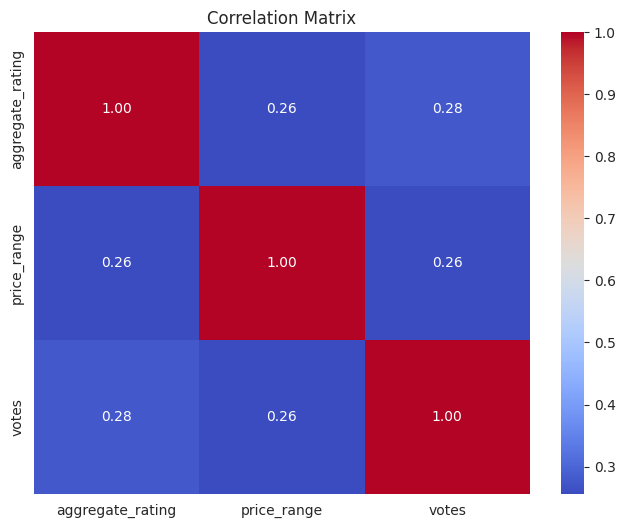

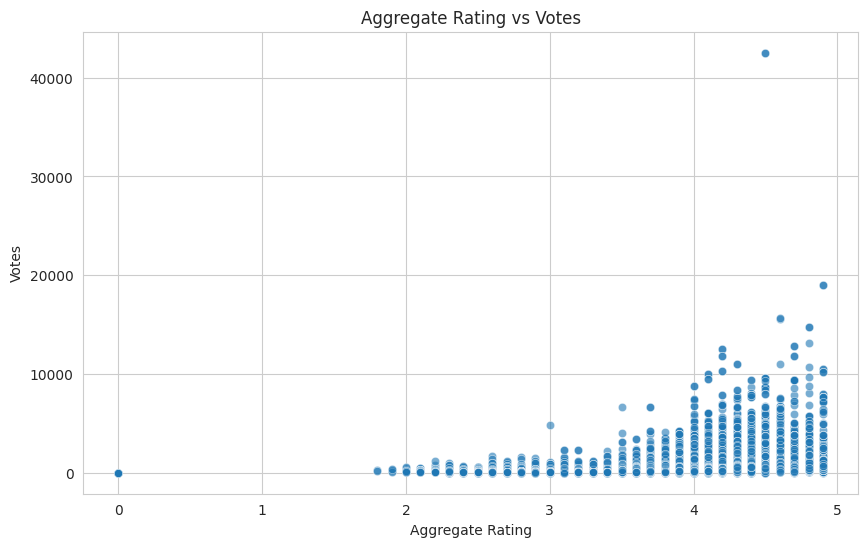

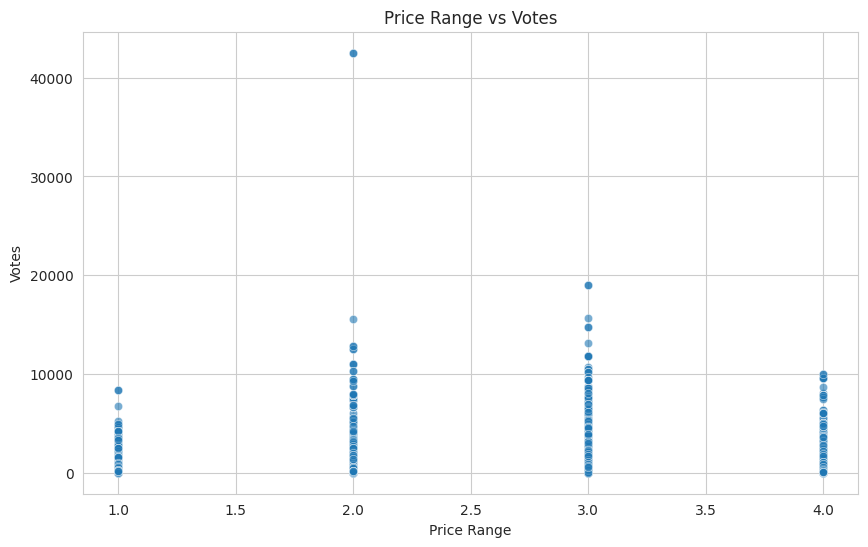

In [24]:
selected_columns = zomato_no_duplicates[['aggregate_rating', 'price_range', 'votes']]
correlation_matrix = selected_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=zomato_no_duplicates, x='aggregate_rating', y='votes', alpha=0.6)
plt.title('Aggregate Rating vs Votes')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=zomato_no_duplicates, x='price_range', y='votes', alpha=0.6)
plt.title('Price Range vs Votes')
plt.xlabel('Price Range')
plt.ylabel('Votes')
plt.show()


In [25]:
selected_city = 'Mumbai'
mumbai_data = zomato_no_duplicates[zomato_no_duplicates['city'] == selected_city]

mumbai_cuisine_data = mumbai_data.explode('cuisines')

top_cuisines_mumbai = mumbai_cuisine_data['cuisines'].value_counts().head(5).index

top_cuisine_competitors = mumbai_cuisine_data[mumbai_cuisine_data['cuisines'].isin(top_cuisines_mumbai)]

competitors_analysis = top_cuisine_competitors.groupby(['cuisines', 'name']).agg(
    Average_Rating=('aggregate_rating', 'mean'),
    Average_Cost=('average_cost_for_two', 'mean'),
    Price_Range=('price_range', 'mean')
).reset_index()

top_competitors_by_cuisine = competitors_analysis.sort_values(by=['cuisines', 'Average_Rating', 'Average_Cost'], ascending=[True, False, False])

top_competitors_by_cuisine.head(10)

,cuisines,name,Average_Rating,Average_Cost,Price_Range
36,"Bakery, Desserts",Vanilla Beans,4.6,500.0,2.0
5,"Bakery, Desserts",Cake Centre-The Dessert Maker,4.5,300.0,1.0
25,"Bakery, Desserts",Libon - The Cake Expert,4.4,500.0,2.0
9,"Bakery, Desserts",Cocoamaya,4.3,400.0,1.0
11,"Bakery, Desserts",Country of Origin,4.3,400.0,1.0
29,"Bakery, Desserts",Sinful Dough,4.3,400.0,1.0
18,"Bakery, Desserts",Gluttony,4.2,700.0,2.0
32,"Bakery, Desserts",Sweet Passions,4.2,500.0,2.0
34,"Bakery, Desserts",The Cake Factory,4.2,500.0,2.0
4,"Bakery, Desserts",Brownie Point,4.2,400.0,1.0


In [27]:
top_chinese_competitors_mumbai = top_cuisine_competitors[top_cuisine_competitors['cuisines'] == 'Chinese']

competitors_strength_weakness = top_chinese_competitors_mumbai.groupby('name').agg(
    Average_Rating=('aggregate_rating', 'mean'),
    Votes=('votes', 'sum'),
    Average_Cost=('average_cost_for_two', 'mean'),
    Price_Range=('price_range', 'mean')
).reset_index()

competitors_strength_weakness = competitors_strength_weakness.sort_values(by=['Average_Rating', 'Votes'], ascending=[False, False])

competitors_strength_weakness.head(10)

,name,Average_Rating,Votes,Average_Cost,Price_Range


In [30]:
# Additional data needed: Number of votes for each restaurant
# Filtering data for top Chinese cuisine competitors in Mumbai
top_chinese_competitors_mumbai = top_cuisine_competitors[top_cuisine_competitors['cuisines'] == 'Chinese']

# Aggregating data to find competitors based on average rating, average cost, and number of votes
competitors_strength_weakness = top_chinese_competitors_mumbai.groupby('name').agg(
    Average_Rating=('aggregate_rating', 'mean'),
    Votes=('votes', 'sum'),  # Sum of votes for popularity
    Average_Cost=('average_cost_for_two', 'mean'),
    Price_Range=('price_range', 'mean')
).reset_index()

# Sorting data by average rating and votes
competitors_strength_weakness = competitors_strength_weakness.sort_values(by=['Average_Rating', 'Votes'], ascending=[False, False])

# Displaying the top 10 competitors
competitors_strength_weakness.head(10)  # Displaying the top 10 results for brevity


,name,Average_Rating,Votes,Average_Cost,Price_Range


In [32]:
# Additional data needed: Number of votes for each restaurant
# Filtering data for top Chinese cuisine competitors in Mumbai
top_chinese_competitors_mumbai = top_cuisine_competitors[top_cuisine_competitors['cuisines'] == 'Chinese']

# Aggregating data to find competitors based on average rating, average cost, and number of votes
competitors_strength_weakness = top_chinese_competitors_mumbai.groupby('name').agg(
    Average_Rating=('aggregate_rating', 'mean'),
    Votes=('votes', 'sum'),  # Sum of votes for popularity
    Average_Cost=('average_cost_for_two', 'mean'),
    Price_Range=('price_range', 'mean')
).reset_index()

# Sorting data by average rating and votes
competitors_strength_weakness = competitors_strength_weakness.sort_values(by=['Average_Rating', 'Votes'], ascending=[False, False])

# Displaying the top 10 competitors
competitors_strength_weakness.head(10)  # Displaying the top 10 results for brevity


,name,Average_Rating,Votes,Average_Cost,Price_Range


In [33]:
# Filter the dataset for Mumbai and explore the distribution of cuisines and price ranges
mumbai_restaurants = zomato[zomato['city'].str.lower() == 'mumbai']

# Count the frequency of different cuisines
cuisine_counts = mumbai_restaurants['cuisines'].str.split(', ').explode().value_counts()

# Count the frequency of different price ranges
price_range_counts = mumbai_restaurants['price_range'].value_counts()

# Display the counts of cuisines and price ranges to identify less common ones
cuisine_counts, price_range_counts


(cuisines
 North Indian        2444
 Chinese             1735
 Continental         1516
 Italian             1372
 Fast Food           1271
                     ... 
 Raw Meats              2
 German                 1
 Assamese               1
 Charcoal Chicken       1
 Cafe Food              1
 Name: count, Length: 92, dtype: int64,
 price_range
 3    2074
 4    1535
 1    1522
 2    1366
 Name: count, dtype: int64)

In [34]:
# Overall Dataset Statistics
total_restaurants = zomato_no_duplicates.shape[0]
unique_cities = zomato_no_duplicates['city'].nunique()
unique_localities = zomato_no_duplicates['locality'].nunique()
rating_range = (zomato_no_duplicates['aggregate_rating'].min(), zomato_no_duplicates['aggregate_rating'].max())
total_votes = zomato_no_duplicates['votes'].sum()

# Cuisine Statistics
unique_cuisines = len(set([cuisine for sublist in zomato_no_duplicates['cuisines'].dropna().str.split(', ') for cuisine in sublist]))
most_common_cuisines = pd.Series([cuisine for sublist in zomato_no_duplicates['cuisines'].dropna().str.split(', ') for cuisine in sublist]).value_counts().head(5)

# Pricing Statistics
average_cost = zomato_no_duplicates['average_cost_for_two'].mean()
cost_range = (zomato_no_duplicates['average_cost_for_two'].min(), zomato_no_duplicates['average_cost_for_two'].max())
price_range_distribution = zomato_no_duplicates['price_range'].value_counts()

# Popularity Statistics
average_votes = zomato_no_duplicates['votes'].mean()
top_voted_restaurants = zomato_no_duplicates[['name', 'votes']].sort_values(by='votes', ascending=False).head(5)

# Compiling Statistics
statistics = {
    'Total Number of Restaurants': total_restaurants,
    'Number of Unique Cities': unique_cities,
    'Number of Unique Localities': unique_localities,
    'Rating Range': rating_range,
    'Total Number of Votes': total_votes,
    'Number of Unique Cuisines': unique_cuisines,
    'Most Common Cuisines': most_common_cuisines,
    'Average Cost for Two': average_cost,
    'Cost Range for Two': cost_range,
    'Price Range Distribution': price_range_distribution,
    'Average Number of Votes per Restaurant': average_votes,
    'Top Voted Restaurants': top_voted_restaurants
}

statistics


{'Total Number of Restaurants': 60417,
 'Number of Unique Cities': 99,
 'Number of Unique Localities': 3731,
 'Rating Range': (0.0, 4.9),
 'Total Number of Votes': 15803570,
 'Number of Unique Cuisines': 133,
 'Most Common Cuisines': North Indian    21259
 Chinese         14139
 Fast Food       13191
 Desserts         7755
 Beverages        7486
 Name: count, dtype: int64,
 'Average Cost for Two': 538.3045169405962,
 'Cost Range for Two': (0, 30000),
 'Price Range Distribution': price_range
 1    30680
 2    18378
 3     8301
 4     3058
 Name: count, dtype: int64,
 'Average Number of Votes per Restaurant': 261.57488786268766,
 'Top Voted Restaurants':                               name  votes
 77763                     Bawarchi  42539
 78324                     Bawarchi  42539
 19636  Byg Brewski Brewing Company  18967
 19931  Byg Brewski Brewing Company  18967
 19648                         Toit  15705}

In [35]:
statistics_table = pd.DataFrame({
    'Statistic Description': [
        'Total Number of Restaurants',
        'Number of Unique Cities',
        'Number of Unique Localities',
        'Rating Range (Min to Max)',
        'Total Number of Votes',
        'Number of Unique Cuisines',
        'Average Cost for Two',
        'Cost Range for Two (Min to Max)',
        'Average Number of Votes per Restaurant'
    ],
    'Value': [
        total_restaurants,
        unique_cities,
        unique_localities,
        f"{rating_range[0]} to {rating_range[1]}",
        total_votes,
        unique_cuisines,
        f"₹{average_cost:.2f}",
        f"₹{cost_range[0]} to ₹{cost_range[1]}",
        f"{average_votes:.2f}"
    ]
})

statistics_table


,Statistic Description,Value
0,Total Number of Restaurants,60417
1,Number of Unique Cities,99
2,Number of Unique Localities,3731
3,Rating Range (Min to Max),0.0 to 4.9
4,Total Number of Votes,15803570
5,Number of Unique Cuisines,133
6,Average Cost for Two,₹538.30
7,Cost Range for Two (Min to Max),₹0 to ₹30000
8,Average Number of Votes per Restaurant,261.57


([0, 1, 2, 3, 4],
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'Continental'),
  Text(2, 0, 'Chinese'),
  Text(3, 0, 'Italian'),
  Text(4, 0, 'Fast Food')])

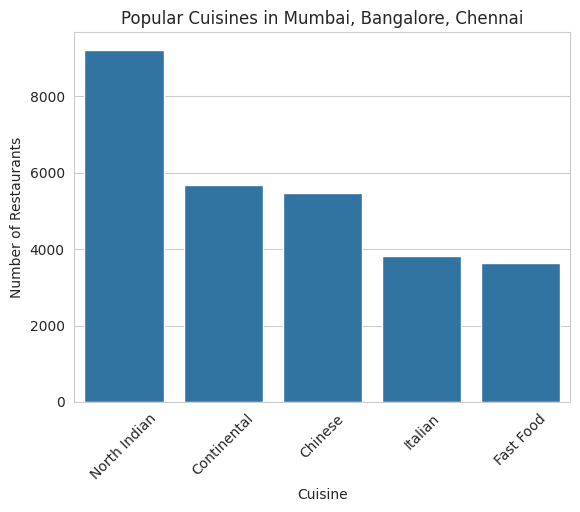

In [36]:
top_cities_data = zomato[zomato['city'].isin(['Mumbai', 'Bangalore', 'Chennai'])]
top_cuisines = top_cities_data['cuisines'].str.split(', ').explode().value_counts().nlargest(5)
sns.barplot(x=top_cuisines.index, y=top_cuisines.values)
plt.title("Popular Cuisines in Mumbai, Bangalore, Chennai")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)

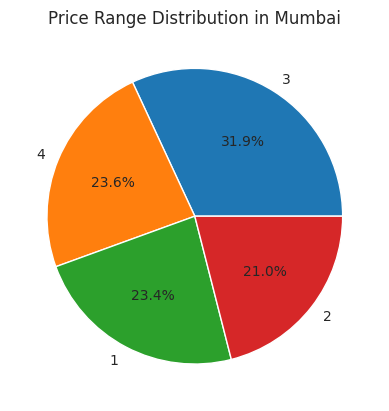

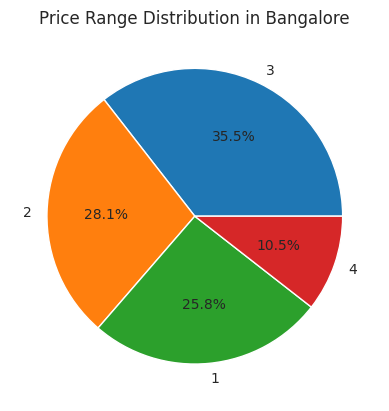

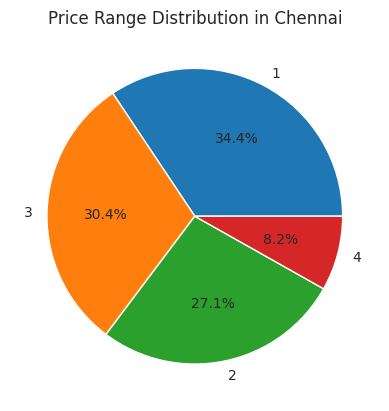

In [37]:
for city in ['Mumbai', 'Bangalore', 'Chennai']:
    city_data = zomato[zomato['city'] == city]
    price_counts = city_data['price_range'].value_counts()
    plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%')
    plt.title(f"Price Range Distribution in {city}")
    plt.show()


Text(0, 0.5, 'Number of Restaurants')

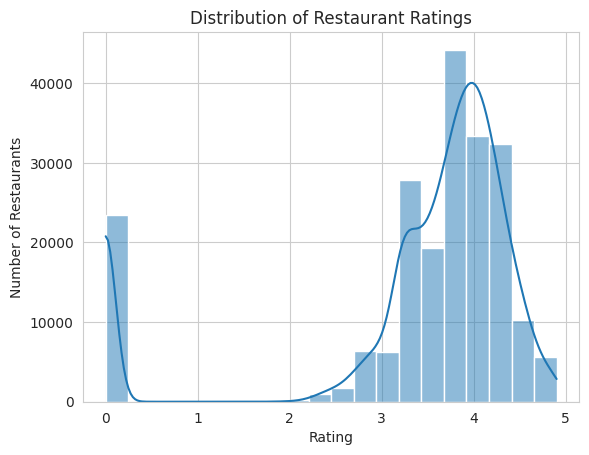

In [38]:
sns.histplot(zomato['aggregate_rating'], bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")

<Figure size 1000x600 with 0 Axes>

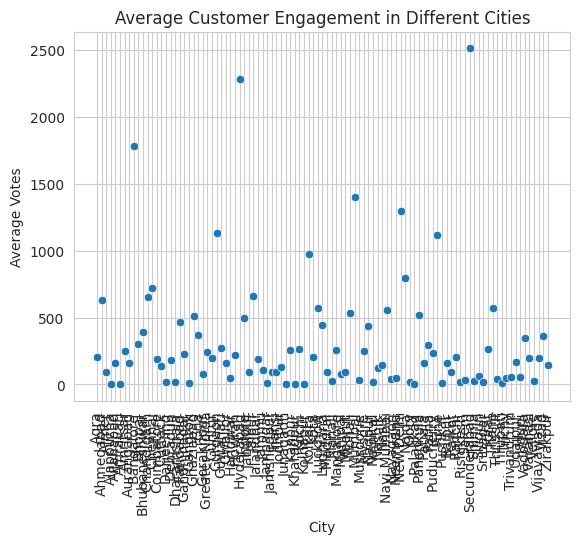

<Figure size 1000x600 with 0 Axes>

In [39]:
engagement_data = zomato.groupby('city')['votes'].mean().reset_index()
sns.scatterplot(x='city', y='votes', data=engagement_data)
plt.xticks(rotation=90)
plt.title("Average Customer Engagement in Different Cities")
plt.xlabel("City")
plt.ylabel("Average Votes")
plt.figure(figsize=(10, 6))


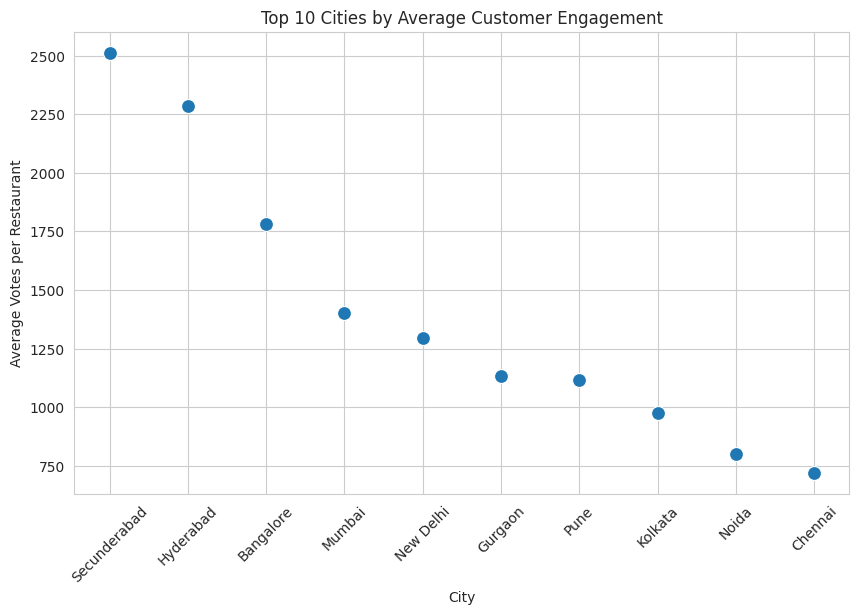

In [40]:
# Since the dataset is currently inaccessible, I'll provide a Python code snippet that you can run in your environment to create the desired scatter plot. This code will plot the average customer engagement (votes) for the top 10 cities.

# Python code to generate the scatter plot:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'zomato_data_no_duplicates' is your cleaned dataset
# Calculating the average votes for each city
city_votes = zomato.groupby('city')['votes'].mean().reset_index()

# Sorting the cities by average votes and selecting the top 10
top_cities_by_votes = city_votes.sort_values('votes', ascending=False).head(10)

# Creating the scatter plot
plt.figure(figsize=(10, 6))  # Increased figure size
sns.scatterplot(x='city', y='votes', data=top_cities_by_votes, s=100)  # s=100 increases the marker size
plt.title('Top 10 Cities by Average Customer Engagement')
plt.xlabel('City')
plt.ylabel('Average Votes per Restaurant')
plt.xticks(rotation=45)
plt.show()

# Run this code in your Python environment after loading the Zomato dataset. This will generate the scatter plot for the top 10 cities based on average customer engagement.


Text(0.5, 1.0, 'City vs. Average Cost for Two')

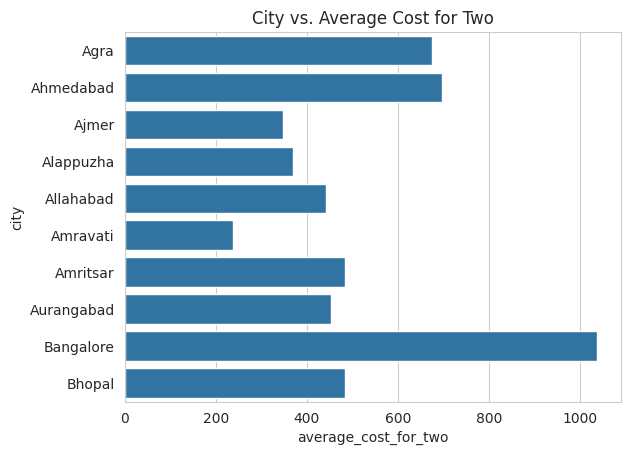

In [41]:
city_cost_data = zomato.groupby('city')['average_cost_for_two'].mean().reset_index().head(10)
sns.barplot(data=city_cost_data, x='average_cost_for_two', y='city')
plt.title('City vs. Average Cost for Two')


Text(0.5, 1.0, 'Top 10 Popular Cuisines')

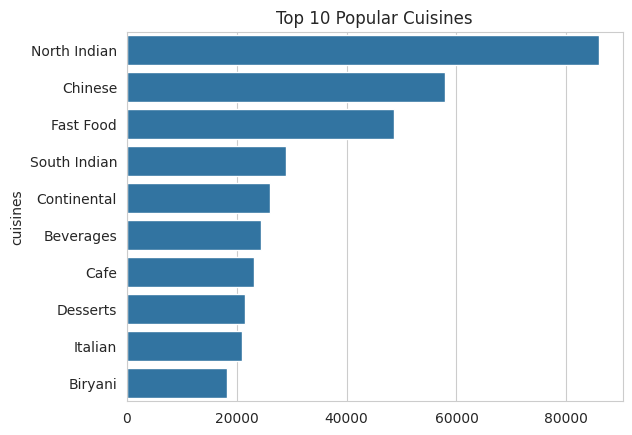

In [42]:
cuisines_data = zomato['cuisines'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=cuisines_data.values, y=cuisines_data.index)
plt.title('Top 10 Popular Cuisines')

Text(0.5, 1.0, 'Price Range vs. Aggregate Rating')

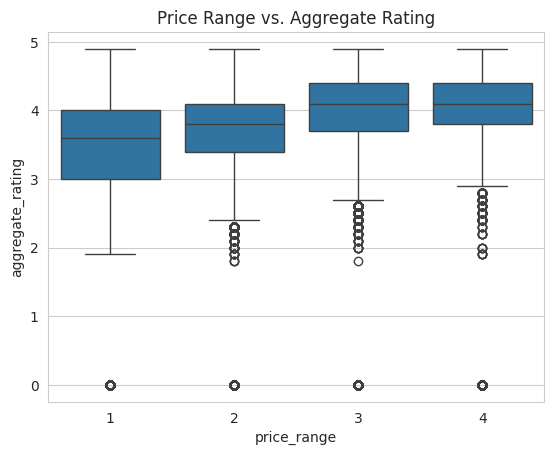

In [43]:
sns.boxplot(data=zomato, x='price_range', y='aggregate_rating')
plt.title('Price Range vs. Aggregate Rating')


Text(0.5, 1.0, 'Aggregate Rating vs. Votes')

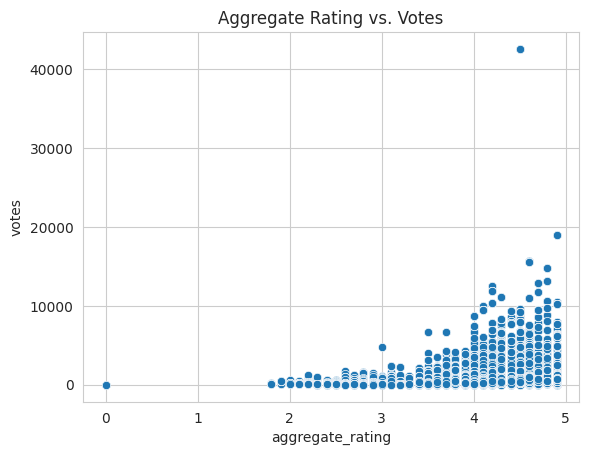

In [44]:
sns.scatterplot(data=zomato, x='aggregate_rating', y='votes')
plt.title('Aggregate Rating vs. Votes')


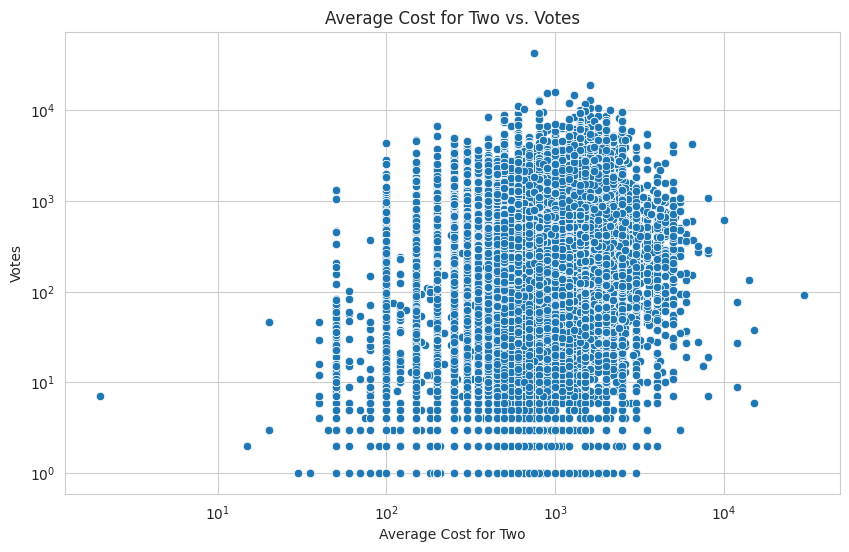

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming zomato_data_no_duplicates is the cleaned dataset
cost_votes_data = zomato[['average_cost_for_two', 'votes']]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_cost_for_two', y='votes', data=cost_votes_data)
plt.title('Average Cost for Two vs. Votes')
plt.xlabel('Average Cost for Two')
plt.ylabel('Votes')
plt.xscale('log')  # Logarithmic scale for x-axis
plt.yscale('log')  # Logarithmic scale for y-axis
plt.show()

Text(0, 0.5, 'City')

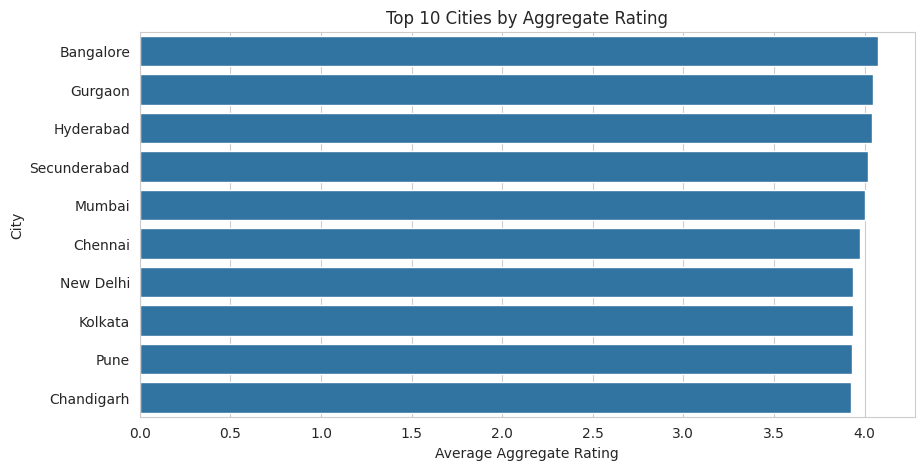

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

city_rating = zomato.groupby('city')['aggregate_rating'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='aggregate_rating', y='city', data=city_rating.sort_values('aggregate_rating', ascending=False).head(10))
plt.title('Top 10 Cities by Aggregate Rating')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('City')


Text(0, 0.5, 'Cuisine')

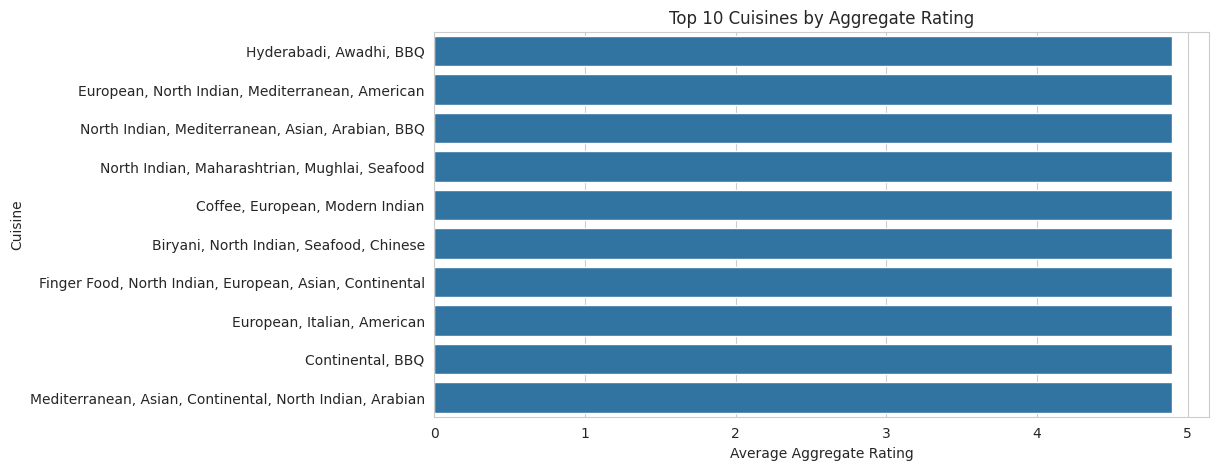

In [47]:
cuisines_rating = zomato.explode('cuisines').groupby('cuisines')['aggregate_rating'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='aggregate_rating', y='cuisines', data=cuisines_rating.sort_values('aggregate_rating', ascending=False).head(10))
plt.title('Top 10 Cuisines by Aggregate Rating')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine')

Text(0, 0.5, 'Establishment Type')

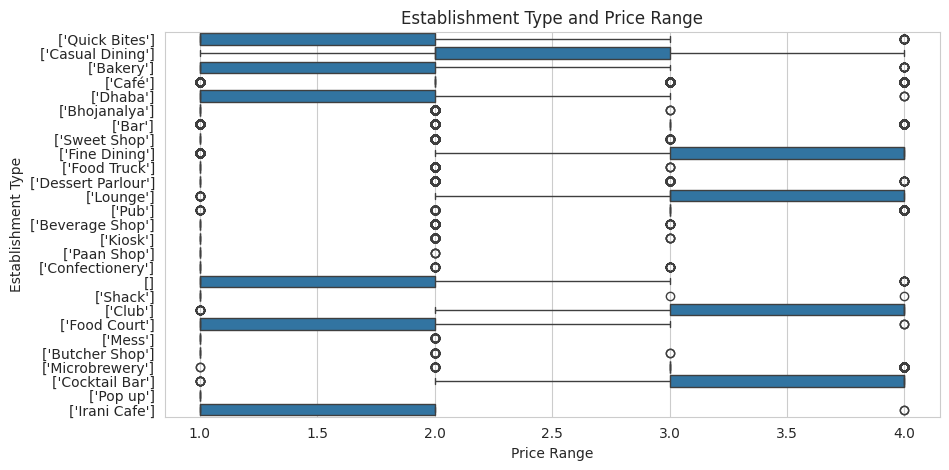

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='price_range', y='establishment', data=zomato)
plt.title('Establishment Type and Price Range')
plt.xlabel('Price Range')
plt.ylabel('Establishment Type')

Text(0, 0.5, 'Live Music')

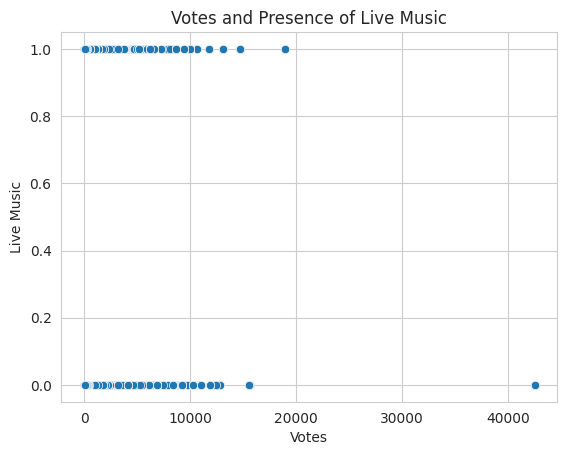

In [49]:
# Assuming 'highlights' column is a list of features. Taking one feature for example: 'Live Music'
zomato['Live_Music'] = zomato['highlights'].apply(lambda x: 'Live Music' in x)
sns.scatterplot(x='votes', y='Live_Music', data=zomato)
plt.title('Votes and Presence of Live Music')
plt.xlabel('Votes')
plt.ylabel('Live Music')

Text(0, 0.5, 'City')

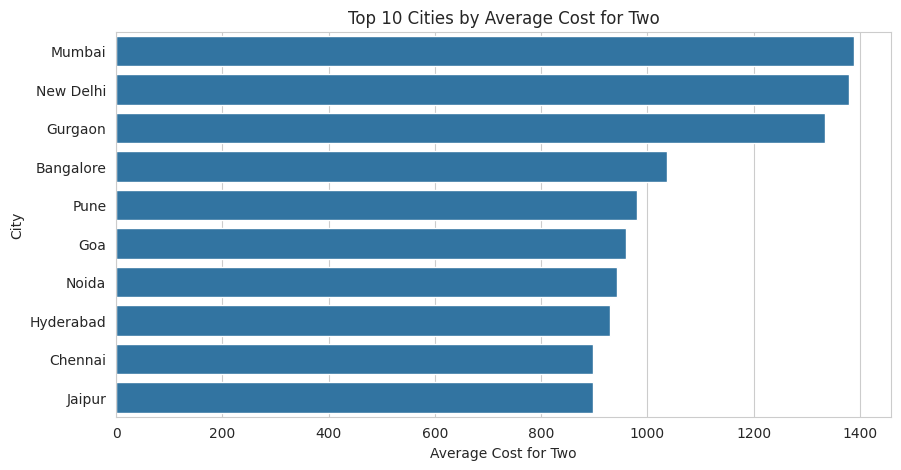

In [50]:
city_cost = zomato.groupby('city')['average_cost_for_two'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='average_cost_for_two', y='city', data=city_cost.sort_values('average_cost_for_two', ascending=False).head(10))
plt.title('Top 10 Cities by Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('City')

Text(0, 0.5, 'Photo Count')

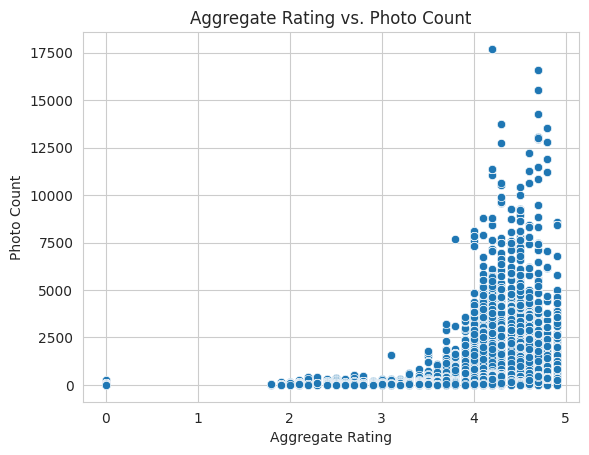

In [51]:
sns.scatterplot(x='aggregate_rating', y='photo_count', data=zomato)
plt.title('Aggregate Rating vs. Photo Count')
plt.xlabel('Aggregate Rating')
plt.ylabel('Photo Count')


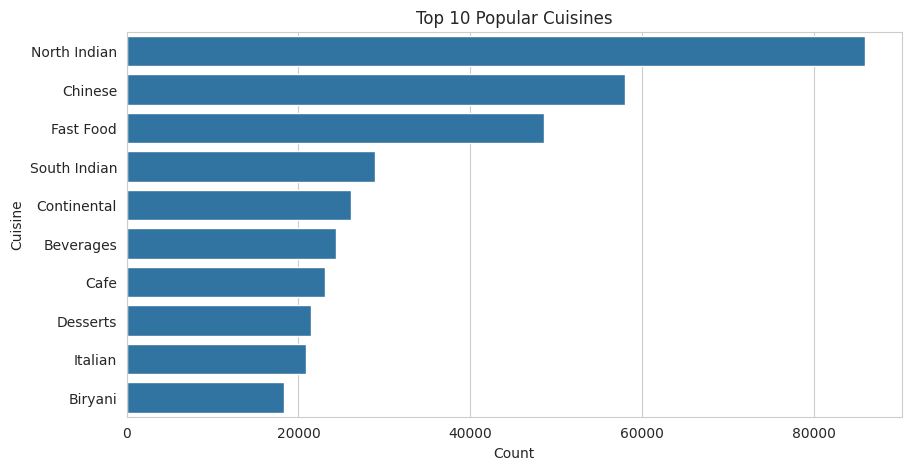

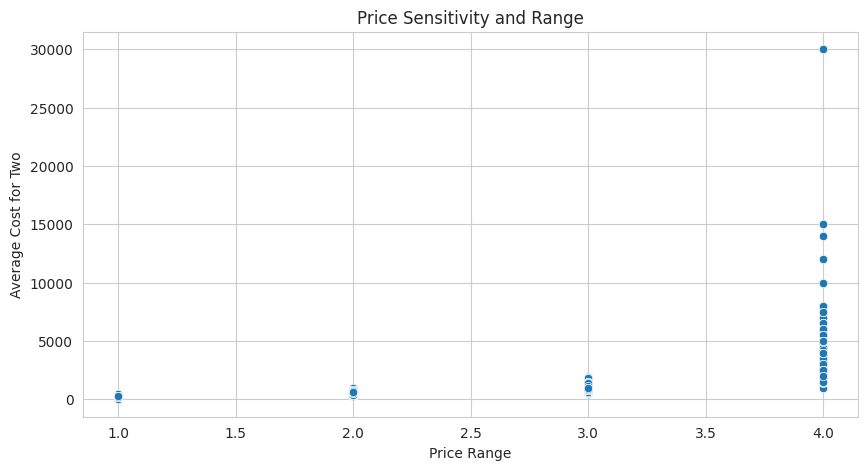

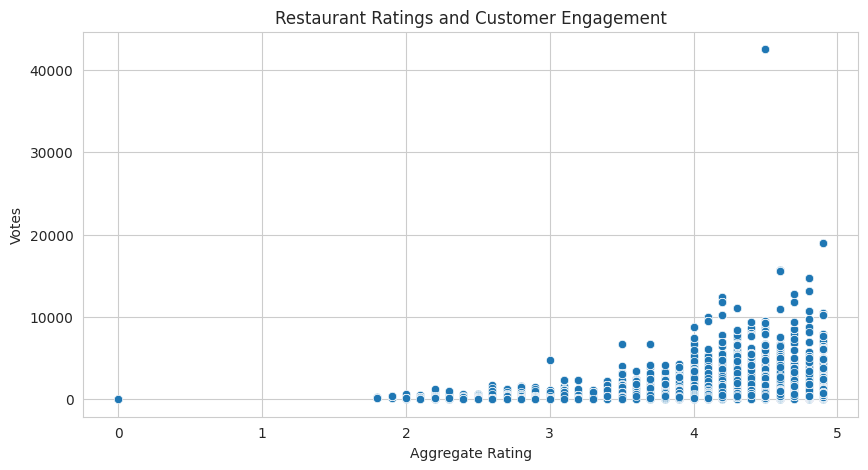

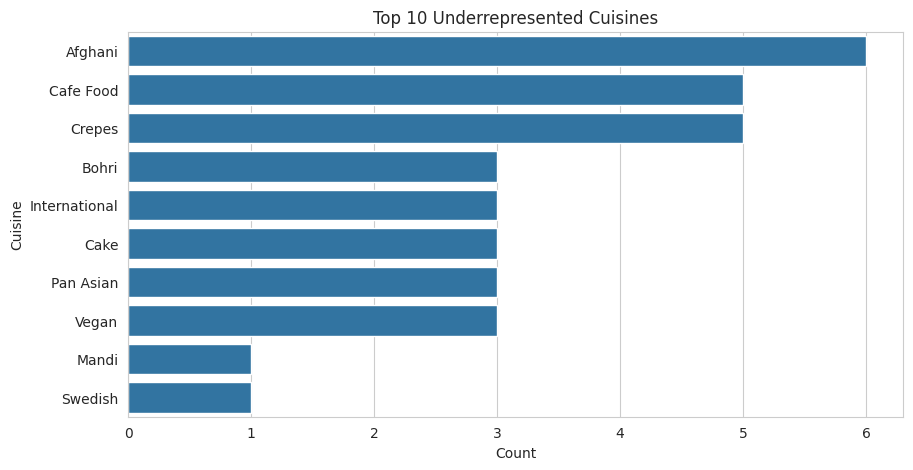

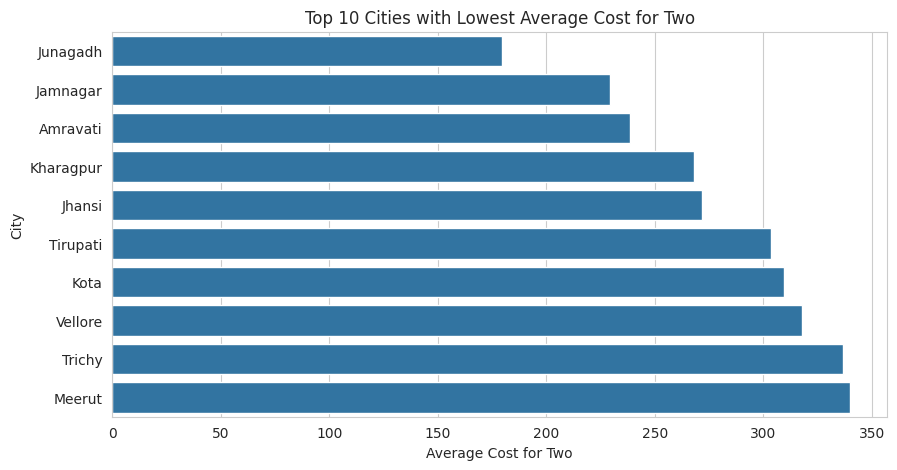

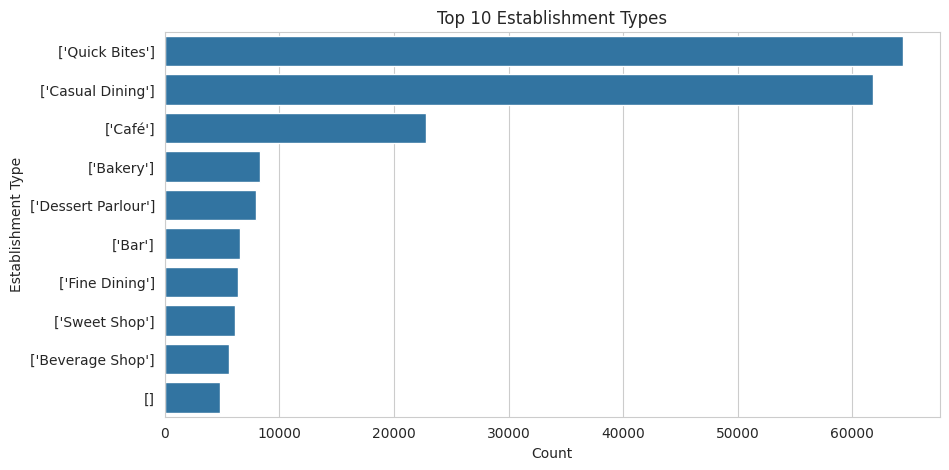

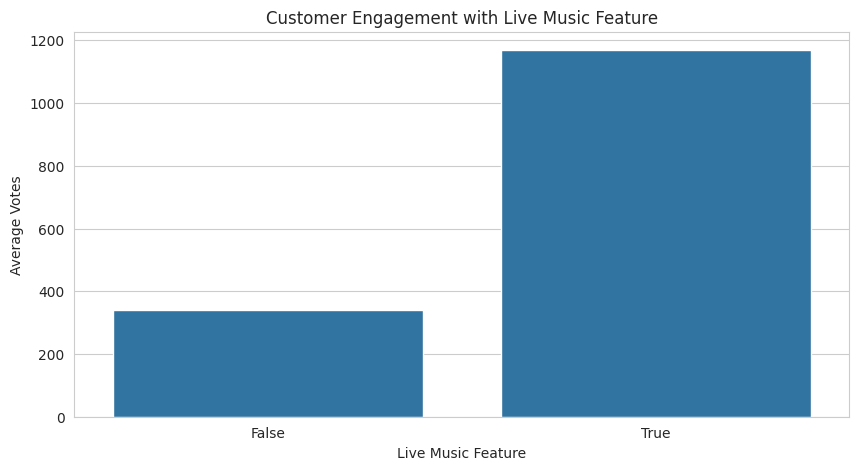

In [52]:
# Preparing data for the graphs from the Zomato dataset

# Popular Cuisines
popular_cuisines = zomato['cuisines'].str.split(', ').explode().value_counts().head(10)

# Price Sensitivity and Range
price_sensitivity = zomato[['price_range', 'average_cost_for_two']]

# Restaurant Ratings and Customer Engagement
ratings_engagement = zomato[['aggregate_rating', 'votes']]

# Underrepresented Cuisines and Price Ranges
# (For demonstration, selecting cuisines and price ranges with lower frequencies)
underrepresented_cuisines = zomato['cuisines'].str.split(', ').explode().value_counts().tail(10)
underrepresented_price_ranges = zomato['price_range'].value_counts().sort_values().head(10)

# Regional Variations in Dining Preferences (Average Cost for Two by City)
regional_preferences = zomato.groupby('city')['average_cost_for_two'].mean().sort_values().head(10)

# Establishment Types and Market Positioning
establishment_types = zomato['establishment'].str.split(', ').explode().value_counts().head(10)

# High Customer Engagement in Specific Features (e.g., Live Music)
# Assuming 'highlights' column contains these features; for demonstration, using 'Live Music'
zomato['Live_Music'] = zomato['highlights'].apply(lambda x: 'Live Music' in x)
live_music_engagement = zomato.groupby('Live_Music')['votes'].mean()

# Plotting the graphs

# Graph 1: Popular Cuisines
plt.figure(figsize=(10, 5))
sns.barplot(x=popular_cuisines.values, y=popular_cuisines.index)
plt.title('Top 10 Popular Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

# Graph 2: Price Sensitivity and Range
plt.figure(figsize=(10, 5))
sns.scatterplot(x='price_range', y='average_cost_for_two', data=price_sensitivity)
plt.title('Price Sensitivity and Range')
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')
plt.show()

# Graph 3: Restaurant Ratings and Customer Engagement
plt.figure(figsize=(10, 5))
sns.scatterplot(x='aggregate_rating', y='votes', data=ratings_engagement)
plt.title('Restaurant Ratings and Customer Engagement')
plt.xlabel('Aggregate Rating')
plt.ylabel('Votes')
plt.show()

# Graph 4: Underrepresented Cuisines and Price Ranges
plt.figure(figsize=(10, 5))
sns.barplot(x=underrepresented_cuisines.values, y=underrepresented_cuisines.index)
plt.title('Top 10 Underrepresented Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

# Graph 5: Regional Variations in Dining Preferences
plt.figure(figsize=(10, 5))
sns.barplot(x=regional_preferences.values, y=regional_preferences.index)
plt.title('Top 10 Cities with Lowest Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('City')
plt.show()

# Graph 6: Establishment Types and Market Positioning
plt.figure(figsize=(10, 5))
sns.barplot(x=establishment_types.values, y=establishment_types.index)
plt.title('Top 10 Establishment Types')
plt.xlabel('Count')
plt.ylabel('Establishment Type')
plt.show()

# Graph 7: High Customer Engagement in Specific Features (e.g., Live Music)
plt.figure(figsize=(10, 5))
sns.barplot(x=live_music_engagement.index, y=live_music_engagement.values)
plt.title('Customer Engagement with Live Music Feature')
plt.xlabel('Live Music Feature')
plt.ylabel('Average Votes')
plt.show()


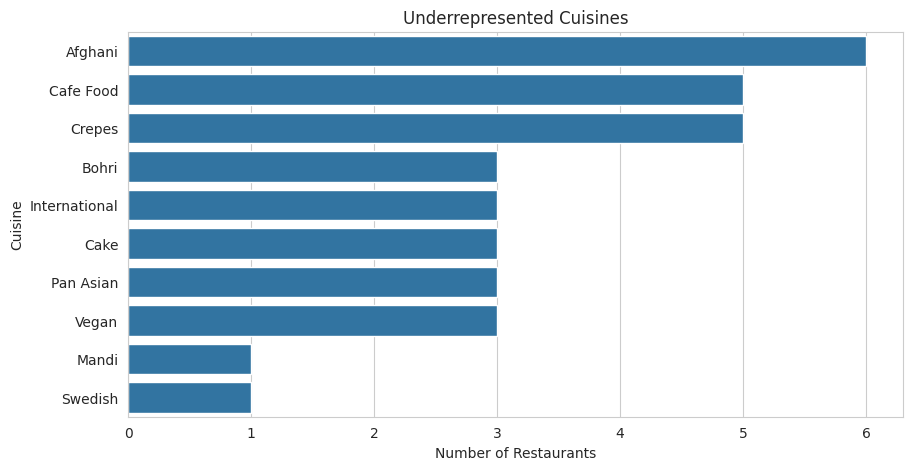

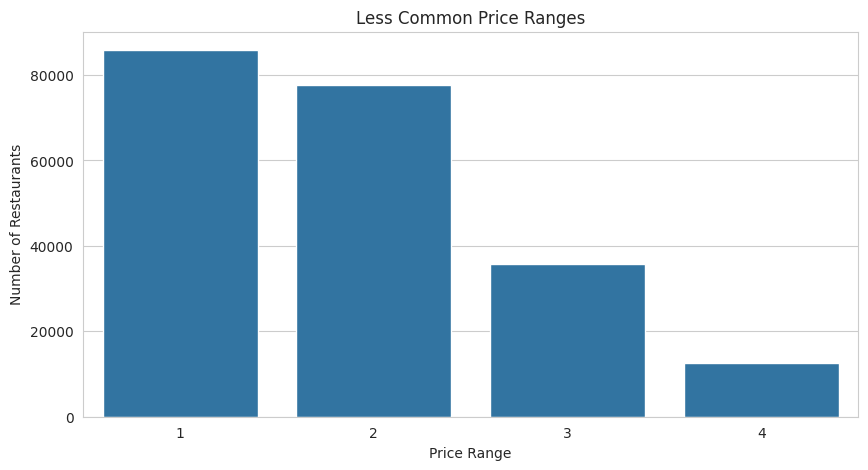

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'zomato_data_no_duplicates' is the cleaned dataset

# Identifying underrepresented cuisines
cuisine_counts = zomato['cuisines'].str.split(', ').explode().value_counts()
underrepresented_cuisines = cuisine_counts.tail(10)  # Assuming the last 10 are underrepresented

# Identifying less common price ranges
price_range_counts = zomato['price_range'].value_counts()
less_common_price_ranges = price_range_counts.tail(10)  # Assuming the last 10 are less common

# Plotting Bar Graph for Underrepresented Cuisines
plt.figure(figsize=(10, 5))
sns.barplot(x=underrepresented_cuisines.values, y=underrepresented_cuisines.index)
plt.title('Underrepresented Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

# Plotting Bar Graph for Less Common Price Ranges
plt.figure(figsize=(10, 5))
sns.barplot(x=less_common_price_ranges.index, y=less_common_price_ranges.values)
plt.title('Less Common Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

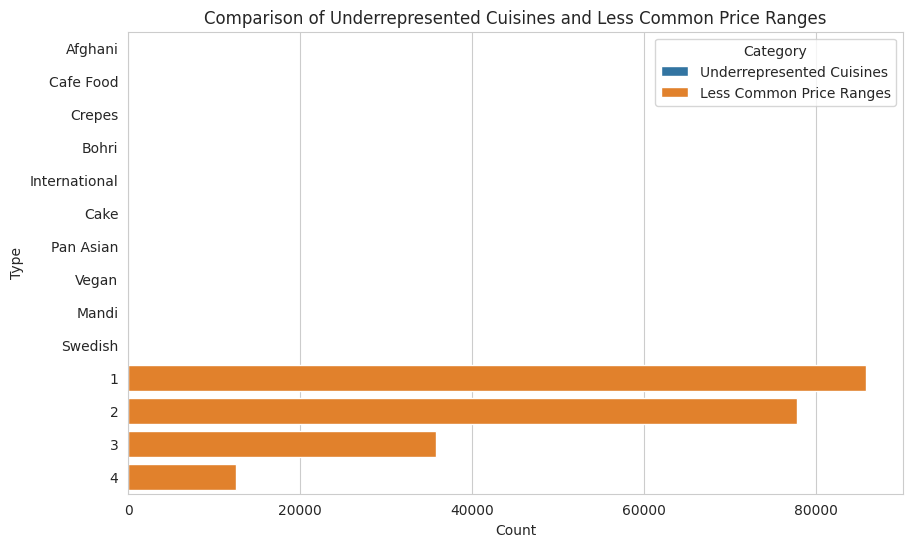

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'zomato_data_no_duplicates' is your cleaned dataset

# Identifying underrepresented cuisines
cuisine_counts = zomato['cuisines'].str.split(', ').explode().value_counts()
underrepresented_cuisines = cuisine_counts.tail(10)  # Tail end cuisines are typically underrepresented

# Identifying less common price ranges
price_range_counts = zomato['price_range'].value_counts()
less_common_price_ranges = price_range_counts.tail(10)  # Less common price ranges

# Combine underrepresented cuisines and less common price ranges for comparison
combined_data = pd.DataFrame({
    'Category': ['Underrepresented Cuisines']*len(underrepresented_cuisines) + ['Less Common Price Ranges']*len(less_common_price_ranges),
    'Type': list(underrepresented_cuisines.index) + list(less_common_price_ranges.index),
    'Count': list(underrepresented_cuisines.values) + list(less_common_price_ranges.values)
})

# Plotting the combined bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Type', hue='Category', data=combined_data)
plt.title('Comparison of Underrepresented Cuisines and Less Common Price Ranges')
plt.xlabel('Count')
plt.ylabel('Type')


plt.show()

In [55]:
# Assuming 'zomato_data_no_duplicates' is your DataFrame containing the Zomato dataset
cuisines = zomato['cuisines'].str.split(', ').explode()
unique_cuisines_count = cuisines.nunique()
print(unique_cuisines_count)


133


In [56]:
# Selecting a city for the analysis - let's use Mumbai as an example
selected_city = 'Mumbai'
mumbai_data = zomato[zomato['city'] == selected_city]

# Exploding the cuisine data for detailed analysis
mumbai_data['cuisines'] = mumbai_data['cuisines'].str.split(', ')
mumbai_cuisine_data = mumbai_data.explode('cuisines')

# Analyzing competitors based on cuisine, pricing, and ratings
# We will focus on the top 5 cuisines in Mumbai
top_cuisines_mumbai = mumbai_cuisine_data['cuisines'].value_counts().head(5).index

# Filtering data for top cuisines
top_cuisine_competitors = mumbai_cuisine_data[mumbai_cuisine_data['cuisines'].isin(top_cuisines_mumbai)]

# Aggregating data to find competitors based on average rating and average cost
competitors_analysis = top_cuisine_competitors.groupby(['cuisines', 'name']).agg(
    Average_Rating=('aggregate_rating', 'mean'),
    Average_Cost=('average_cost_for_two', 'mean'),
    Price_Range=('price_range', 'mean')
).reset_index()

# Sorting data to identify top competitors in each cuisine category
top_competitors_by_cuisine = competitors_analysis.sort_values(by=['cuisines', 'Average_Rating', 'Average_Cost'], ascending=[True, False, False])

top_competitors_by_cuisine.head(10)  # Displaying the top 10 results for brevity


<ipython-input-56-139245bbec48>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai_data['cuisines'] = mumbai_data['cuisines'].str.split(', ')


,cuisines,name,Average_Rating,Average_Cost,Price_Range
40,Chinese,Bottle Wottle,4.900000,1700.0,3.0
222,Chinese,Palladium Social,4.900000,1400.0,3.0
183,Chinese,Lord of the Drinks,4.800000,2100.0,4.0
100,Chinese,February 30,4.800000,2000.0,4.0
361,Chinese,Yazu - Pan Asian Supper Club,4.800000,1700.0,3.0
163,Chinese,Kebabs And Curries Company,4.800000,800.0,2.0
141,Chinese,Hitchki,4.728846,1600.0,3.0
360,Chinese,Yauatcha,4.700000,2800.0,4.0
182,Chinese,Lord Of The Drinks,4.700000,2100.0,4.0
23,Chinese,Asian Town,4.700000,1800.0,3.0
